# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores

data = pd.read_csv('assets/real_estate.csv', sep=';')
print(data)

       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting   

       phone_realEstate                            

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
casa_más_cara = data.loc[data['price'].idxmax()]
direccion_cara = casa_más_cara['address']
precio_cara = casa_más_cara['price']

print(f"La casa con dirección en {direccion_cara} es la más cara y su precio es de {precio_cara} USD")

La casa con dirección en El Escorial es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [76]:
casa_más_barata = data.loc[data['price'].idxmin()]
dirección_barata = casa_más_barata['address']
precio_barata = casa_más_barata['price']

# Como las casas no deberían costar 0 euros, filtré los datos para obtener solo valores mayores que cero.
data_precios_filtrados = data[data['price'] > 0]
precio_más_bajo = data_precios_filtrados['price'].min()
casa_precio_más_bajo = data_precios_filtrados.loc[data_precios_filtrados['price'] == precio_más_bajo]
dirección_casa_más_barata = casa_precio_más_bajo['address'].values[0]
print(f"La casa con dirección en {dirección_casa_más_barata} es la más barata y su precio es de {precio_más_bajo} USD")



La casa con dirección en Berlin, Coslada es la más barata y su precio es de 600 USD


In [79]:
data_precios_filtrados = data[data['price'] > 0]
precio_más_bajo = data_precios_filtrados['price'].min()
casa_precio_más_bajo = data_precios_filtrados[data_precios_filtrados['price'] == precio_más_bajo]

for i, row in casa_precio_más_bajo.iterrows():
    dirección_casa = row['address']

print(f"La casa con dirección en {dirección_casa} es la más barata y su precio es de {precio_más_bajo} USD")

La casa con dirección en Berlin, Coslada es la más barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
casa_grande = data.loc[data['surface'].idxmax()]
casa_pequeña = data.loc[data['surface'].idxmin()]


dirección_casa_grande = casa_grande['address']
area_casa_grande = casa_grande['surface']

dirección_casa_pequeña = casa_pequeña['address']
area_casa_pequeña = casa_pequeña['surface']

print(f"La casa más grande está ubicada en {dirección_casa_grande} y su superficie es de {area_casa_grande} metros cuadrados.")
print(f"La casa más pequeña está ubicada en {dirección_casa_pequeña} y su superficie es de {area_casa_pequeña} metros cuadrados.")


La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 249000.0 metros cuadrados.
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros cuadrados.


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [6]:
poblaciones = data['level5'].unique()
poblaciones_str = ', '.join(poblaciones)

print(poblaciones_str)

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [4]:
# filas que contienen NAs
con_NA_fila = data.isna().any(axis=1)
print("Fila")
print(con_NA_fila)

Fila
0        True
1        True
2        True
3        True
4        True
         ... 
15330    True
15331    True
15332    True
15333    True
15334    True
Length: 15335, dtype: bool


In [5]:
# columnas que contienen NAs 
con_NA_columnas = data.isna().any()
print("Columna")
print(con_NA_columnas)

Columna
Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
dimension_original = data.shape

# para asegurarme de que las columnas esenciales ("precio", "dirección", "superficie") estén completas, 
# ya que son esenciales para el análisis de propiedades

columnas_esenciales = ['price', 'address', 'surface']
data_filtrada = data.dropna(subset=columnas_esenciales)

# para eliminar filas con muchos valores NaN, manteniendo al menos el 80% de los datos no nulos.
threshold =int(data.shape[1] * 0.8)
data_final = data_filtrada.dropna(thresh=threshold)
dimension_data_final = data_final.shape


print(f"Original: {dimension_original} VERSUS Final: {dimension_data_final}")



Original: (15335, 37) VERSUS Final: (14084, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
arroyomolinos_df = data[data['level5'] == 'Arroyomolinos (Madrid)']
media_precio_arroyomolinos = arroyomolinos_df['price'].mean()

print(media_precio_arroyomolinos)

294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


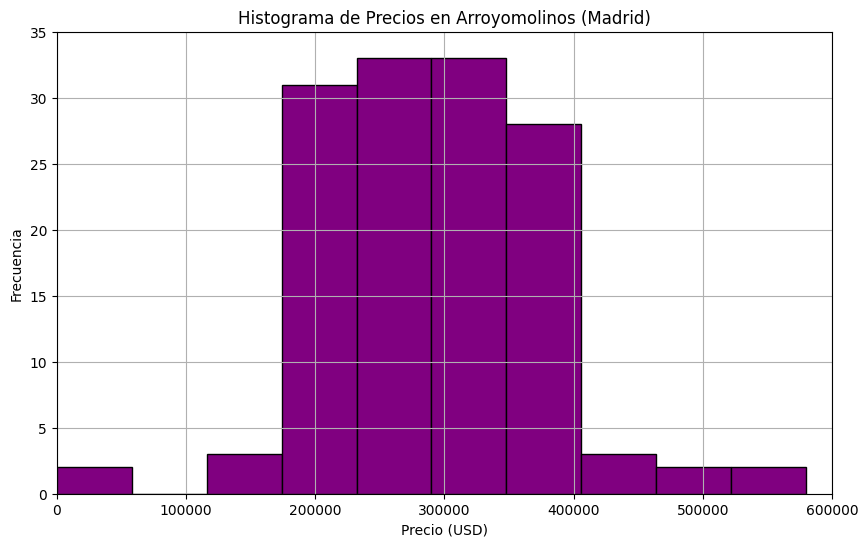

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('assets/real_estate.csv', sep=';')
arroyomolinos_df = data[data['level5'] == 'Arroyomolinos (Madrid)']

plt.figure(figsize=(10,6))
plt.hist(arroyomolinos_df['price'], color='purple', edgecolor='black')
plt.title('Histograma de Precios en Arroyomolinos (Madrid)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xlim([0, 600000])
plt.ylim([0, 35])

plt.show()

**TODO: Markdown**. El histograma refleja la distribuición de los precios de las viviendas en ArroyoMolinos, una localidad en la comunidad de Madrid.
La distribuición de los precios parece relativamente simétrica, con una ligera concentración en el rango de 200 000 a 400 000 USD. Esto sugiere que la mayoria de los precios de las viviendas se encuentran en este rango medio.
Al analisar la asimetría del histograma, es notable que existe una ligera asimetría hacia la derecha (sesgo positivo), lo que indica que hay algunas viviendas con precios más altos, aunque no es una cantidad muy significativa. La mayoria de las viviendas se concentran en un rango de precios más accesible, con menos propiedades en los extremos altos del espectro.
Se observan algunas barras solitarias en el extremo derecho del histograma, particularmente en el rango de 500 000 a 600 000 USD. Estas podrían representar outliers o propriedades significativamente más caras que la mayoría en la zona.
Por fin, centrando en la concentración de precios, el histograma muestra un pico en el rango de 200 000 a 400 000 USD, lo que indica que una gran parte de las viviendas en Arroyomolinos se encuentran en este rango de precios. Esto sugiere que el mercado inmboliario en esta zona está más concentrado en precios moderados, con menos oferta en rango de lujo.


#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [12]:
valdemorillo_df = data[data['level5'] == 'Valdemorillo']
galapagar_df = data[data['level5'] == 'Galapagar']

media_precio_valdemorillo = valdemorillo_df['price'].mean()
media_precio_galapagar = galapagar_df['price'].mean()

print(f"precio promedio en Valdemorillo: {media_precio_valdemorillo} USD")
print(f"precio promedio en Galapagar: {media_precio_galapagar} USD")
                                      

precio promedio en Valdemorillo: 363860.2931034483 USD
precio promedio en Galapagar: 360063.20238095237 USD


El precio promedio de Valedemorillo es de 363 860.29 USD y en Galapagar es de 360 063.20 USD. Una vez que los precios promedios son parecidos, eso significa que el mercado de viviendas en ambas poblaciones es similar en cuanto a precios. Todavía, a pesar de que las diferencias no sean muy grandes (aproximadamente 3 797,09 USD), podemos concluir que los inmuebles en Valdemorillo tiene un precio promedio ligeramente más alto que en Galapagar. Esta pequeña diferencia podría deberse a varios factores, como la ubicación, la calidad de las propiedades o la demanda en el mercado inmobiliario.

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [6]:
data['pps'] = data['price'] / data['surface']

valdemorillo_df = data[data['level5'] == 'Valdemorillo']
galapagar_df = data[data['level5'] == 'Galapagar']

media_pps_valdemorillo = valdemorillo_df['pps'].mean()
media_pps_galapagar = galapagar_df['pps'].mean()

print(f"promedio de precio por metro cuadrado de Valdemorillo: {media_pps_valdemorillo} USD/m2")
print(f"promedio de precio por metro cuadrado de Galapagar: {media_pps_galapagar} USD/m2")

promedio de precio por metro cuadrado de Valdemorillo: 1317.9502109024986 USD/m2
promedio de precio por metro cuadrado de Galapagar: 1606.3240303094024 USD/m2


Los promedios de precio por metro cuadrado (precio/m²) en Valdemorillo y Galapagar no son exactamente los mismos. Según los cálculos, el precio promedio por metro cuadrado en Valdemorillo es de 1317.95 USD/m², mientras en Galapagar es de 1606.32 USD/m².

Esta diferencia, de aproximadamente 288.37 USD/m², se puede deberse a varios factores que influyen en el valor de las propiedades en estas dos áreas:
- ubicación, demanda y servicios: Galapagar está más cerca de Madrid que Valdemorillo, lo que puede hacer que sea una opción más atractiva para aquellos que buscan proximidad a la capital. Esta cercanía generalmente aumenta la demanda de viviendas, lo que puede elevar el precio por metro cuadrado. Además, una zona con una mayor presencia de comercio y disponibilidad de servicios (escuelas, transporte público, centros comerciales) hace que las propiedades sean más valiosas; lo que podría también explicar los precios más altos en Galapagar, en comparación con Valdemorillo;

- entorno y calidad de vida: Galapagar es conocida por su entorno natural y la calidad de vida que ofrece, lo que puede atraer a compradores que estén dispuestos a pagar más por vivir en una área con estas características;

- calidad de las viviendas: una vez que el tipo de construcción y acabados utilizados pueden definir la sencillez o el lujo del inmueble, se puede sugerir que los inmuebles en Galapagar pueden tener una infraestructura más desarrollada;

- orientación de las propiedades: las viviendas orientadas al sur suelen ser más valoradas, donde la luz solar las torna más eficiente energéticamente, y consecuentemente más agradables.

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

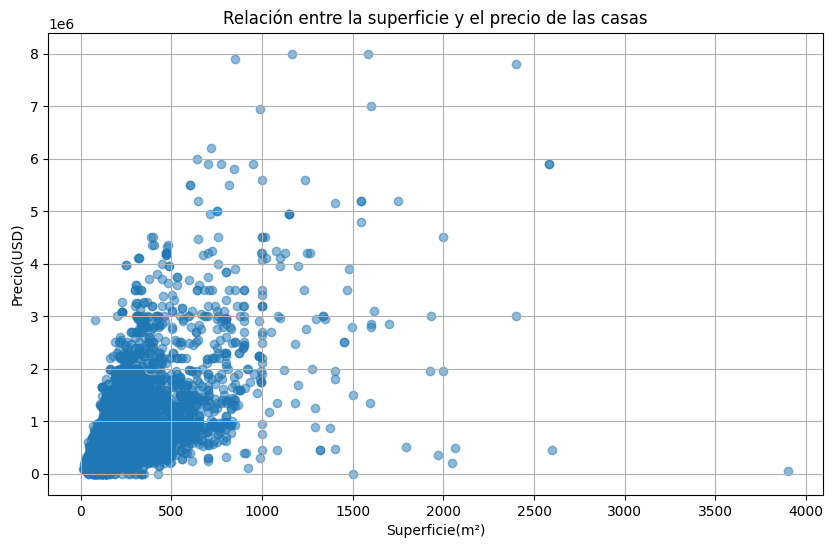

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('assets/real_estate.csv', sep=';')
filtered_data = data[data['surface'] <= 4000]

plt.figure(figsize=(10,6))
plt.scatter(filtered_data ['surface'], filtered_data ['price'], alpha=0.5)
plt.title('Relación entre la superficie y el precio de las casas')
plt.xlabel('Superficie(m²)')
plt.ylabel('Precio(USD)')
plt.grid(True)

plt.show()

El scatter plot obtenido muestra la relación entre la superficie (en metros cuadrados) y el precio (en USD) de las casas en España. En general, el gráfico muestra una correlación positiva entre la superficie de la casa y su precio, lo cual es de esperar: las propiedades más grandes tienden a ser más caras. Sin embargo, esta relación no es lineal, y hay bastante dispersión, especialmente en las propiedades con superficies menores.
Es interesante notar que muchas casas con superficies pequeñas tienen una gran variabilidad en sus precios. Esta amplia dispersión de precios entre casas con áreas más pequeñas, puede indicar que hay factores más allá del tamaño, como la ubicación, el estado de conservación y características específicas (por ejemplo, acabados de lujo o la presencia de comodidades adicionales), que pueden afectar su valor y consecuentemente influir significativamente en el precio.
Aunque hay menos datos para propiedades grandes (más de 1000 m²), los precios tienden a ser más elevados, pero no siempre es así. Curiosamente, existen algunas propiedades grandes con precios relativamente bajos en comparación con otras más pequeñas, y eso puede deberse a que estas grandes propiedades se encuentran en zonas menos valoradas o necesitan una renovación, lo que afecta su valor de mercado.


#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [14]:
numero_agencias = data['realEstate_name'].nunique()
print(numero_agencias)

1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [5]:
conteo_poblaciones = data['level5'].value_counts()

poblacion_max_casas = conteo_poblaciones.idxmax()
max_casas = conteo_poblaciones.max()

print(f"La población con la mayor cantidad de casas es: {poblacion_max_casas} con un total de {max_casas} casas.")

La población con la mayor cantidad de casas es:  Madrid Capital con un total de 6643 casas.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
poblaciones_cinturon_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
ds_cinturon_sur = data[data['level5'].isin(poblaciones_cinturon_sur)]

print(ds_cinturon_sur)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

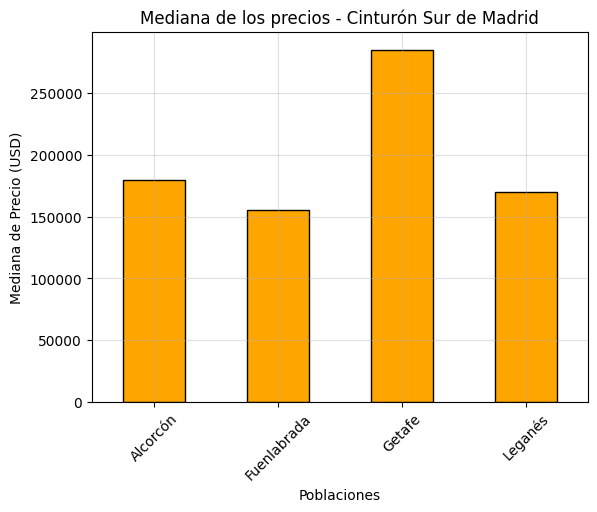

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones_cinturon_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
ds_cinturon_sur = data[data['level5'].isin(poblaciones_cinturon_sur)]
mediana_precios = ds_cinturon_sur.groupby('level5')['price'].median()

mediana_precios.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Mediana de los precios - Cinturón Sur de Madrid')
plt.xlabel('Poblaciones')
plt.ylabel('Mediana de Precio (USD)')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)

plt.show()

El gráfico de barras obtenido muestra la mediana de los precios (en USD) de las casas en las cuatro poblaciones - "Alcorcón", "Fuenlabrada", "Getafe" y "Leganés" - del "Cinturón Sur" de Madrid. 
Se puede observar que, entre las cuatro poblaciones del "Cinturón Sur" de Madrid, las casas en la población "Getafe" tiene la mediana de precios más alta. Esto puede deberse a una variedad de factores, como la calidad de las propiedades, la proximidad de infraestructuras importantes o una mayor demanda del mercado. Para inversores que busquen propiedades en zonas con mayor valorización, Getafe podría ser una recomendación.
Las casas en las poblaciones "Alcorcón" y "Laganés" tienen la mediana de precios similares, ligeramente por debajo de Getafe. Estos datos indican que estas zonas son ligeramente más asequibles en comparación con Getafe, pero siguen estando relativamente valoradas en el mercado inmobiliario.
Por último, las casas en la población "Fuenlabrada" tienen una mediana de precios más baja, lo que sugiere que es el área más asequible entre las cuatro analizadas. Esto puede atraer a compradores con presupuestos más reducidos o inversores que buscan oportunidades en áreas con potencial de crecimiento futuro.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [18]:
poblaciones_cinturon_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
ds_cinturon_sur = data[data['level5'].isin(poblaciones_cinturon_sur)]

variables = ['price', 'rooms', 'surface', 'bathrooms']

for i in variables:
    media = ds_cinturon_sur[i].mean()
    varianza = ds_cinturon_sur[i].var()
    print(f"Variable: {i}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")
    print()


Variable: price
Media: 223094.48070562293
Varianza: 14921367508.04902

Variable: rooms
Media: 3.0177383592017737
Varianza: 0.7188858892927542

Variable: surface
Media: 111.75222363405337
Varianza: 4263.051760316337

Variable: bathrooms
Media: 1.633221850613155
Varianza: 0.5717968625577321



La alta varianza en la variable "precio" indica que existe una gran dispersión en los precios de las propiedades en el "Cinturón Sur" de Madrid, lo que sugiere una importante diversidad en las características y valores de mercado de las propiedades en esta zona. Esto se puede explicar por la existencia de distintos tipos de inmuebles, como apartamentos, casas, mansiones, etc. Incluso dentro de una misma zona (como el "Cinturón Sur" de Madrid), diferentes barrios o calles pueden tener valores de mercado significativamente diferentes debido a la proximidad a servicios, calidad ambiental, seguridad, etc. Además, el precio también se ve influenciado por la gran variación en las superficies de las propiedades, el número de dormitorios y otros factores como la presencia de garaje, piscina o acabados de lujo.


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [19]:
poblaciones_cinturon_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
ds_cinturon_sur = data[data['level5'].isin(poblaciones_cinturon_sur)]

casas_más_caras = ds_cinturon_sur.loc[ds_cinturon_sur.groupby('level5')['price'].idxmax()]
resultado = casas_más_caras[['level5', 'address', 'price']]

print(resultado)


            level5                                address    price
5585      Alcorcón                               Alcorcón   950000
11561  Fuenlabrada  Calle de Paulo Freire, 5, Fuenlabrada   490000
2881        Getafe                                 Getafe  1050000
10412      Leganés           Avenida Reina Sofía, Leganés   650000


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

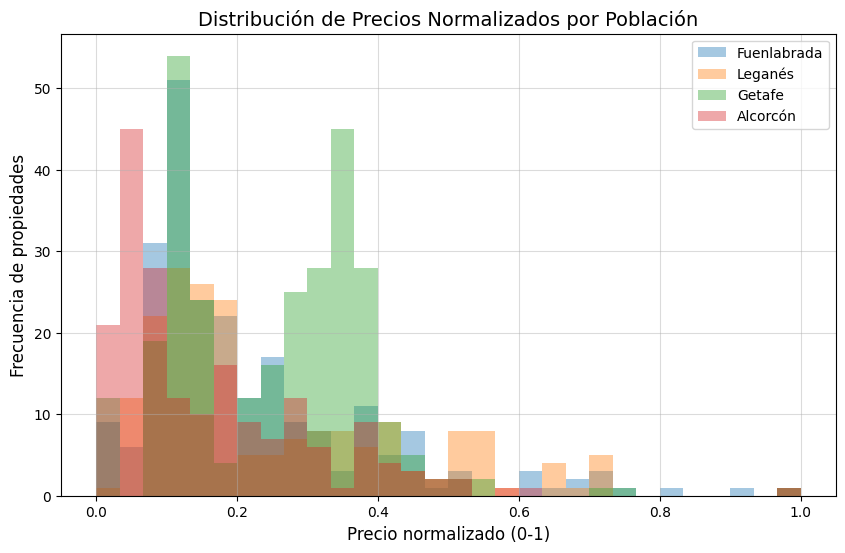

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones_cinturon_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
ds_cinturon_sur = data[data['level5'].isin(poblaciones_cinturon_sur)].copy()

ds_cinturon_sur['precios_normalizados'] = ds_cinturon_sur.groupby('level5')['price'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
                                                                  
plt.figure(figsize=(10,6))

for i in poblaciones_cinturon_sur:
    subset = ds_cinturon_sur[ds_cinturon_sur['level5'] == i]
    plt.hist(subset['precios_normalizados'], bins=30, alpha=0.4, label=i)
colors = ['blue', 'green', 'red', 'orange']
plt.xlabel('Precio normalizado (0-1)', fontsize=12)
plt.ylabel('Frecuencia de propiedades', fontsize=12)
plt.title('Distribución de Precios Normalizados por Población', fontsize=14)
plt.legend()
plt.grid(alpha=0.45)
plt.show()

El gráfico obtenido muestra los histogramas de los precios normalizados de las viviendas en cada una de las cuatro localidades -"Alcorcón", "Fuenlabrada", "Getafe" y "Leganés"- del Cinturón Sur de Madrid.
En general, es posible observar que todas las casas se concentran en el rango de precio más bajo (cercano a 0), lo que indica que una gran proporción de propiedades está en un rango de precio más asequible en relación al precio más alto de la respectiva población.

En relación a Getafe, la mayoría de los inmuebles se concentran en un rango de precio medio, en torno al 0.2 y 0.4, en la escala normalizada. En comparación con las otras poblaciones, el rango de precio medio de las propiedades en Getafe es ligeramente superior.

Por otro lado, Leganés y Fuenlabrada tienen una distribución de precios similar, más concentrada en el rango de precios normalizados bajos, lo que indica que estas poblaciones cuentan con propiedades con precios relativamente asequibles. Sin embargo, se puede observar que en Fuenlabrada hay algunas propiedades que se destacan por su precio significativamente elevado, en comparación con el precio medio de las propiedades de la misma población.

Finalmente, Alcorcón muestra una distribución más uniforme, lo que indica una mayor diversidad de precios (en el rango inferior), aunque inferior a la observada en Getafe, ya que sufre una caída a partir del 0.2.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [21]:
poblaciones_Getafe_Alcorcón = ['Getafe', 'Alcorcón']
ds_municipios_interes = data[data['level5'].isin(poblaciones_Getafe_Alcorcón)].copy()
ds_municipios_interes['pps'] = ds_municipios_interes['price'] / ds_municipios_interes['surface']

print(ds_municipios_interes[['level5', 'price', 'surface', 'pps']].head())
pps_medio = ds_municipios_interes.groupby('level5')['pps'].mean()
print(pps_medio)

       level5   price  surface          pps
85   Alcorcón  107000     50.0  2140.000000
109  Alcorcón  425000    142.0  2992.957746
169    Getafe  290000    195.0  1487.179487
232    Getafe  137400     65.0  2113.846154
233    Getafe  135500     83.0  1632.530120
level5
Alcorcón    2239.302480
Getafe      2066.314949
Name: pps, dtype: float64


En Alcorcón, el precio promedio por metro cuadrado es de 2239.30 USD, más alto que en Getafe (2066.31 USD). Esto podría sugerir que los inmuebles en Alcorcón tienden a ser más caros con relación a su tamaño, que puede deberse a factores como la ubicación, la demanda inmobiliaria o incluso la proximidad a ciertos servicios o infraestructuras importantes.
Getafe aunque tenga un precio por metro cuadrado más bajo, sigue siendo una ciudad con un valor considerable; lo que podría indicar que Getafe ofrece inmuebles más grandes a precios más asequibles por metro cuadrado.
Analizando las casas de manera individual, se puede observar que dentro de las mismas ciudades hay algunas propiedades con precios por metro cuadrado notablemente diferentes. Analizando las casas en Alcorcón, una propiedad tiene un 'pps' (price per square en inglés) de 2992.96 USD/m², mientras que otra con un poco menos de la mitad de su superficie alcanza los 2140 USD/m². 
Estas diferencias pueden explicarse por factores como el estado del inmueble, la ubicación dentro del municipio, la antigüedad o incluso el tipo de inmueble.
Igual que en Alcorcón, en Getafe hay una variabilidad significativa en los precios dentro del mismo municipio, una vez que hay propiedades con un 'pps' de 1487.18 USD/m² y 2113.85 USD/m².

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

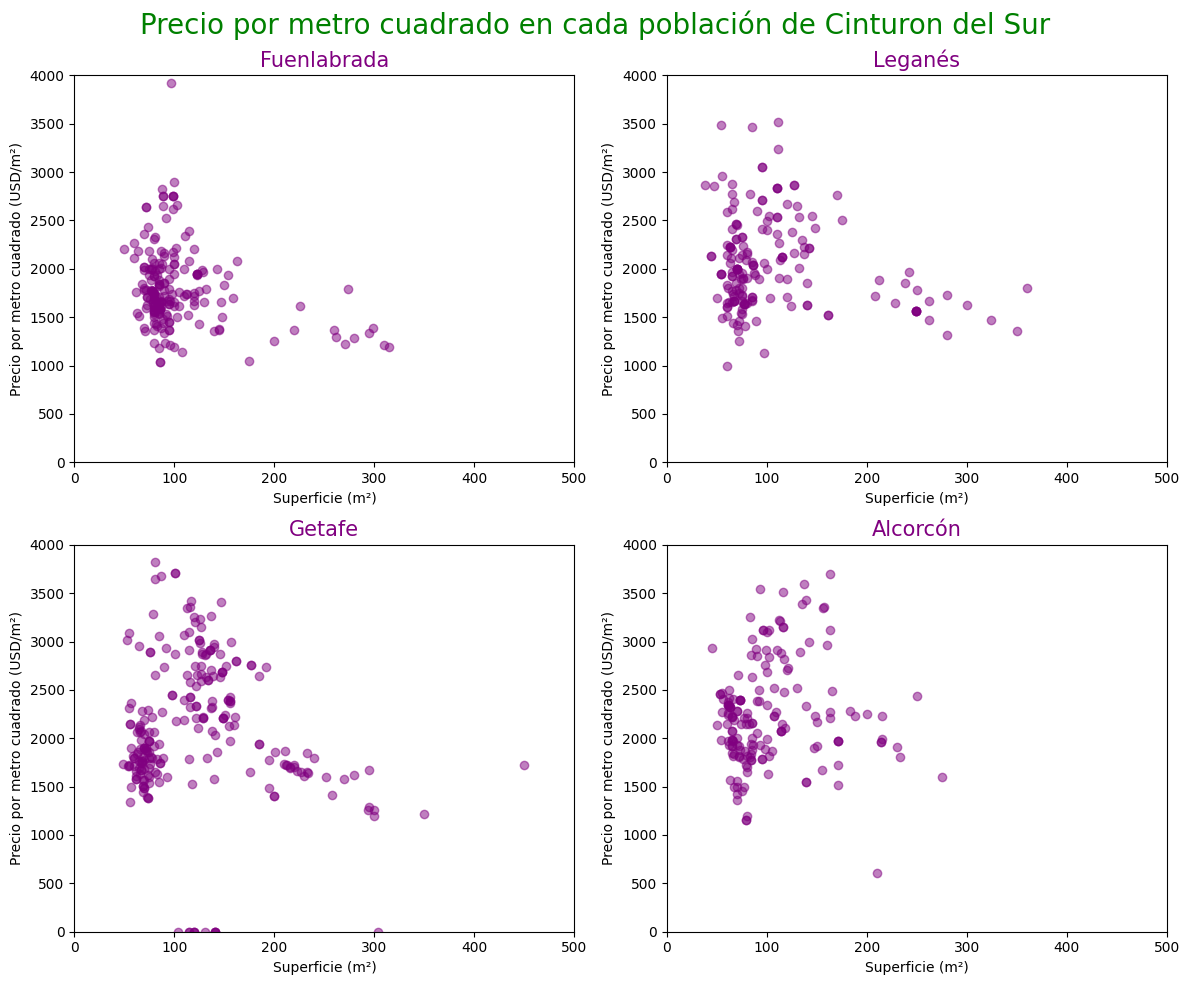

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones_cinturon_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
ds_cinturon_sur = data[data['level5'].isin(poblaciones_cinturon_sur)].copy()
ds_cinturon_sur['pps'] = ds_cinturon_sur['price'] / ds_cinturon_sur['surface']

fig, axs = plt.subplots(2, 2, figsize =(12, 10))

for i, poblacion in enumerate(poblaciones_cinturon_sur):
    subset = ds_cinturon_sur[ds_cinturon_sur['level5'] == poblacion]

    ax = axs[i //2, i % 2]
    ax.scatter(subset['surface'], subset['pps'], color = 'purple', alpha=0.5)
    ax.set_title(poblacion, color = 'purple', fontsize= 15)
    ax.set_xlabel('Superficie (m²)')
    ax.set_ylabel('Precio por metro cuadrado (USD/m²)')
    ax.set_xlim([0, 500])
    ax.set_ylim([0, 4000])

    plt.tight_layout()
    fig.suptitle('Precio por metro cuadrado en cada población de Cinturon del Sur', color = 'green', fontsize=20)
plt.show()


#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [1]:
import pandas as pd
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (40.41, -3.70), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.41, -3.7], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [8]:
## Aquí: traza la coordenadas de los estados
## PON TU CÓDIGO AQUÍ:
import pandas as pd
import folium

data = pd.read_csv('assets/real_estate.csv', sep=';')
poblaciones_cinturon_sur = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
ds_cinturon_sur = data[data['level5'].isin(poblaciones_cinturon_sur)].copy()

ds_cinturon_sur['latitude'] = ds_cinturon_sur['latitude'].str.replace(',', '.').astype(float)
ds_cinturon_sur['longitude'] = ds_cinturon_sur['longitude'].str.replace(',', '.').astype(float)

mapa = folium.Map(location=[40.3377, -3.7688], zoom_start=12)

for _, row in ds_cinturon_sur.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    poblacion = row['level5']
    direccion = row['address']
    folium.Marker(
        location=[lat, lon],
        popup=f"Población: {poblacion}",
        icon=folium.Icon(
            icon='home',
            color='blue' if poblacion == 'Fuenlabrada' else
                         'green' if poblacion == 'Leganés' else
                         'red' if poblacion == 'Getafe' else
                         'orange')
).add_to(mapa)
   
mapa